In [ ]:
import tensorflow as tf
import numpy as np
c = tf.constant([[1,2,3], [4,5,6]])
print("python list input: {}".format(c.get_shape()))
c = tf.constant(np.array([[[1,2,3], [4,5,6]], [[1,1,1], [2,2,2]]]))
print("3d numpy array input:{}".format(c.get_shape()))

python list input: (2, 3)
3d numpy array input:(2, 2, 3)


In [2]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name='c')
    c2 = tf.constant(4, dtype=tf.int32, name='c')
    print(c1.name)
    print(c2.name)

NameError: name 'tf' is not defined

In [188]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name='c')
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4, dtype=tf.int32, name='c')
        c3 = tf.constant(4, dtype=tf.float64, name='c')

print(c1.name)
print(c2.name)
print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


In [189]:
init_val = tf.random_normal((1,5), 1, 1)
var = tf.Variable(init_val, name='var')
print("pre run: \n{}".format(var))

pre run: 
<tf.Variable 'var_38:0' shape=(1, 5) dtype=float32_ref>


In [190]:
init_val = tf.random_normal((1,5), 1, 1)
var = tf.Variable(init_val, name='var')
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_val = sess.run(var)
    
print("\n post run: \n{}".format(post_val))

pre run: 
<tf.Variable 'var_39:0' shape=(1, 5) dtype=float32_ref>



 post run: 
[[-0.03868377  0.3812914   0.22747225  0.47235566 -0.30221784]]


In [191]:
x_data = np.random.randn(5,10)
w_data = np.random.randn(10,1)
xw = tf.matmul(x_data, w_data)
print(x_data, w_data, xw.shape)

b = tf.fill((5,1), -1.)
sess = tf.Session()
print(sess.run(b))

[[ 1.8009855   2.72669566 -0.64451823  0.36146567 -0.52532917 -0.15145536
   0.9556232   1.12471198 -1.13792978 -0.15003317]
 [-1.07439371  1.16660118 -1.49195838  0.85449962 -0.15990029  1.05140261
  -0.0495383  -1.05872732  0.79405935 -0.4685941 ]
 [-0.18853386  0.08942062 -0.71619247  1.14519856  1.12154332  0.28255105
   0.75266657 -0.43381801 -0.16351085  0.78548397]
 [ 0.97075973 -1.29823172 -0.99222922 -0.31189146 -1.94547534 -1.00334297
  -0.09703798  0.30749017  0.35291244 -0.75425194]
 [-0.77951096  0.88775523  0.11991021  0.31951241  0.85945205  0.80990307
  -1.04710196  0.03172204  1.39518691 -1.50317603]] [[-0.24545937]
 [ 0.33739415]
 [ 2.05613885]
 [ 1.24801193]
 [-0.05941653]
 [-0.60687215]
 [ 1.90411934]
 [-0.06959231]
 [-3.09814163]
 [ 0.49416193]] (5, 1)
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


In [192]:
x_data = np.random.randn(5,10)
w_data = np.random.randn(10,1)

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=(5,10))
    w = tf.placeholder(tf.float32, shape=(10,1))
    b = tf.fill((5,1), -1.)
    xw = tf.matmul(x, w)
    
    xwb = xw + b
    s = tf.reduce_max(xwb)
    
    with tf.Session() as sess:
        outs = sess.run(s, feed_dict={x: x_data, w: w_data})
        
print("outs = {}".format(outs))

outs = 1.3753788471221924


In [193]:
x_data = np.random.randn(2000,3)
w_real = [0.3, 0.5,0.1]
b_real = -0.2

noise = np.random.randn(1, 2000)*0.1
y_data = np.matmul(w_real, x_data.T) + b_real + noise
print(x_data, y_data)

[[ 1.00321254  0.51623694  0.5755405 ]
 [-1.93860423 -1.08636002  0.99287029]
 [ 0.85346259  1.75220891 -1.78777733]
 ...
 [-0.38904739  1.32964554 -0.18730534]
 [ 0.24794631  1.35439134  0.59736961]
 [-1.72850087  1.17147754  0.97447408]] [[ 0.50388771 -1.17651076  0.75928051 ...  0.34658548  0.54141744
  -0.182884  ]]


In [194]:
import tensorflow as tf
import numpy as np

x_data = np.random.randn(2000,3)
w_real = [0.3, 0.5,0.1]
b_real = -0.2

noise = np.random.randn(1, 2000)*0.1
y_data = np.matmul(w_real, x_data.T) + b_real + noise

NUM_STEPS = 10

g = tf.Graph()
wb_ = []

with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w, tf.transpose(x)) + b
        
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true - y_pred))
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer()    
    with tf.Session() as sess:
        sess.run(init)
    
        for step in range(NUM_STEPS):
            sess.run(train, feed_dict={x: x_data, y_true: y_data})
            if step % 5 == 0:
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))
                
        print(10, sess.run([w,b]))

0 [array([[0.2770061 , 0.47701782, 0.11386256]], dtype=float32), -0.19274083]
5 [array([[0.2973475 , 0.4988724 , 0.09570871]], dtype=float32), -0.19922476]


10 [array([[0.29734755, 0.49887243, 0.09570866]], dtype=float32), -0.19922483]


In [1]:
import tensorflow as tf
import numpy as np
N = 2000
def sigmoid(x):
    return 1/(1+np.exp(-x))
x_data = np.random.randn(N,3)
w_real = [0.3, 0.5,0.1]
b_real = -0.2
wxb = np.matmul(w_real, x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)     #将wx+b映射到[0,1]之间
y_data = np.random.binomial(1, y_data_pre_noise)      #将上述[0，1]之间的值转为二项分布
# print(y_data)
# print(y_data_1)

NUM_STEPS = 50

g = tf.Graph()
wb_ = []

with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w, tf.transpose(x)) + b
        y_pred = tf.sigmoid(y_pred)
    
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
        loss = tf.reduce_mean(loss)
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer()    
    with tf.Session() as sess:
        sess.run(init)
    
        for step in range(NUM_STEPS):
            sess.run(train, feed_dict={x: x_data, y_true: y_data})
            if step % 5 == 0:
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))
                
        print(50, sess.run([w,b]))

(0, [array([[0.00750441, 0.01574762, 0.00110778]], dtype=float32), -0.019307386])
(5, [array([[0.0440288 , 0.0922797 , 0.00656668]], dtype=float32), -0.11329946])
(10, [array([[0.0784321 , 0.16404548, 0.01181398]], dtype=float32), -0.20225772])
(15, [array([[0.1103511 , 0.23022129, 0.01677271]], dtype=float32), -0.28556764])
(20, [array([[0.13969651, 0.2906677 , 0.02140226]], dtype=float32), -0.36310348])
(25, [array([[0.16655815, 0.34567466, 0.02569024]], dtype=float32), -0.43506372])
(30, [array([[0.1911195 , 0.39573795, 0.02964286]], dtype=float32), -0.5018207])
(35, [array([[0.21359977, 0.44141424, 0.03327713]], dtype=float32), -0.56381655])
(40, [array([[0.23422067, 0.48324427, 0.03661547]], dtype=float32), -0.6215021])
(45, [array([[0.25319022, 0.5217186 , 0.03968239]], dtype=float32), -0.67530525])
(50, [array([[0.26730362, 0.550373  , 0.04195701]], dtype=float32), -0.71581674])


In [1]:
pwd

u'/Users/william/PycharmProjects/ML'

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [7]:
txt=open("/Users/william/Desktop/data.txt").read()

In [8]:
txt

'Meng Wanzhou: Trapped in a gilded cage\n Meng Wanzhou home\nMeng Wanzhou is currently under house arrest at her home in Vancouver, pictured above\nOn a corner in a leafy, exclusive area of Vancouver sits a solid-looking grey house. At the front, there is a low wall with a well-maintained garden behind.\n\nAt first sight, it appears little different to the other homes around it. But outside the main door there is a security guard and in the street others sit watching from expensive black vehicles.\n\nThis is one of two Vancouver homes owned by Meng Wanzhou, the Chinese business executive arrested at the city\'s airport in December.\n\nHer detention has led to a ferocious diplomatic row between China and Canada - and accusations of retaliation by Beijing.\n\nIt has also given the world a glimpse of something rarely seen: the personal life of a member of the Chinese elite.\n\n\'A quiet and modest individual\'\n\nMs Meng is currently on bail. She is due in court early next month (Feb 6), 

In [11]:
wc = WordCloud()
wc.generate(txt)

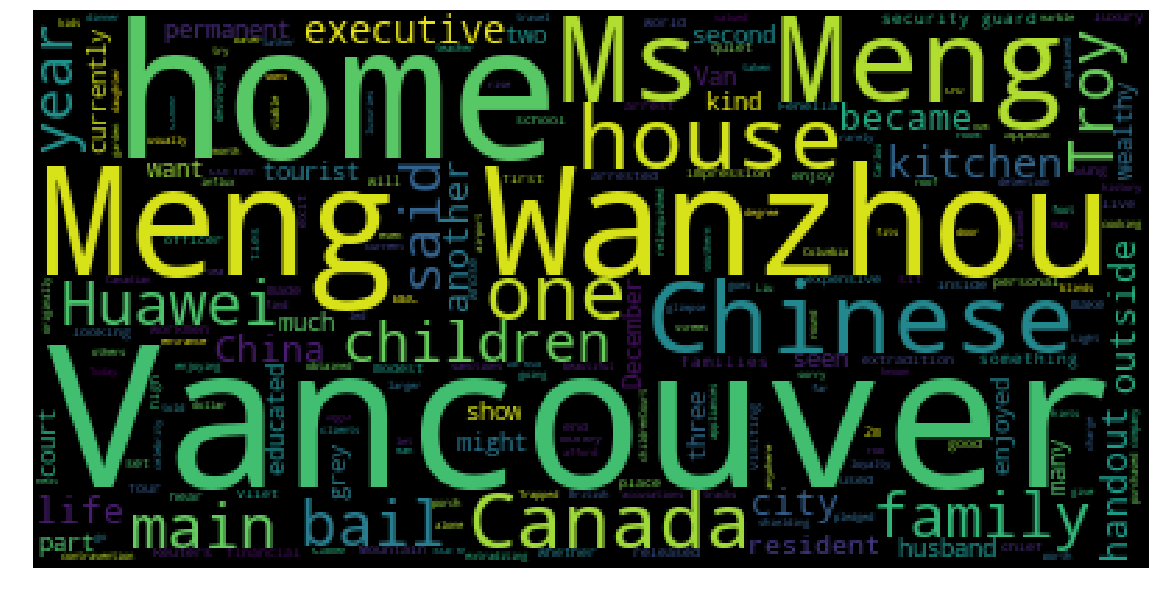

In [16]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(wc)

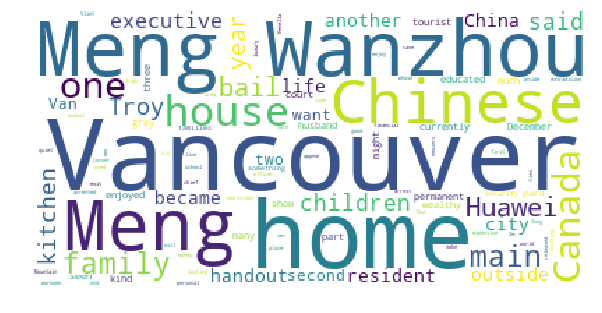

In [26]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

txt=open("/Users/william/Desktop/data.txt").read()
sw = set(STOPWORDS)
sw.add("Ms")
wc = WordCloud(stopwords=sw, max_words=100, background_color='white')
wc.generate(txt)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wc)

In [27]:
mask=np.array(Image.open("/Users/william/Desktop/qiaoba.png"))

In [28]:
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 252],
        [253, 255, 252],
        [253, 255, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 252],
        [253, 255, 252],
        [253, 255, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 252],
        [253, 255, 252],
        [253, 255, 252]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

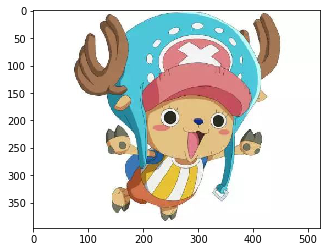

In [31]:
plt.imshow(mask)

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

txt=open("/Users/william/Desktop/data.txt").read()
mask=np.array(Image.open("/Users/william/Desktop/qiaoba.png"))
sw = set(STOPWORDS)
sw= sw.union(("Ms","said", "many"))
wc = WordCloud(stopwords=sw, max_words=50, background_color='white', mask= mask)
wc.generate(txt)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

ModuleNotFoundError: No module named 'PIL'